# Load Data 

In [648]:
import pandas as pd 
import os 

PATH = 'coding_round_data.csv'
df_eco = pd.read_csv(PATH)

In [649]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('mode.chained_assignment', None)

In [650]:
df_eco.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [651]:
df_eco.shape

(12330, 18)

In [652]:
df_eco.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [653]:
df_eco.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [654]:
df_eco.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [655]:
df_eco.loc[df_eco.duplicated(keep=False)].head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
85,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
132,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False


In [656]:
len(df_eco_dropdp.loc[df_eco_dropdp.duplicated(keep=False)])

0

In [657]:
df_eco_dropdp = df_eco.drop_duplicates()

In [658]:
len(df_eco_dropdp.loc[df_eco_dropdp.duplicated(keep=False)])

0

# Data EDA

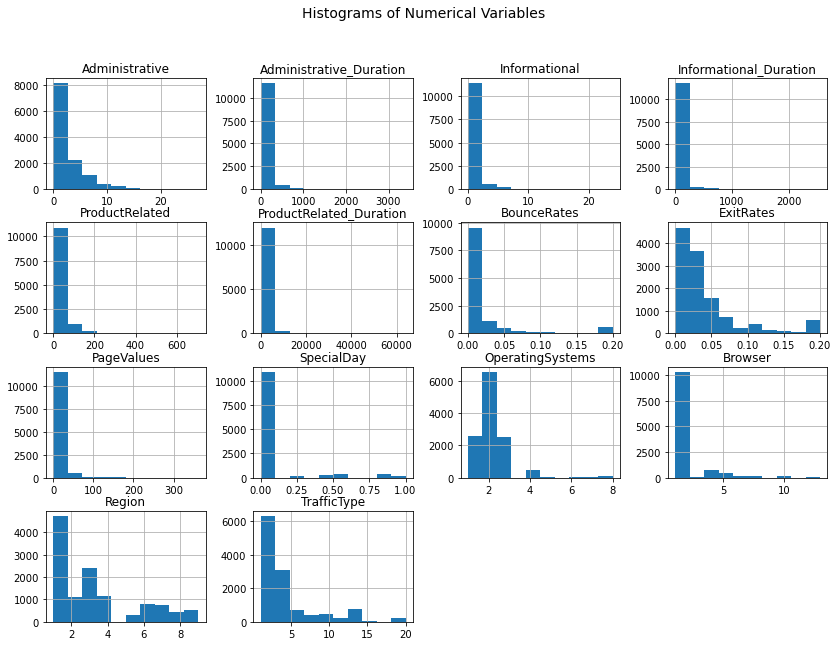

In [659]:
import matplotlib.pyplot as plt
import seaborn as sns

df_eco_num = df_eco_dropdp.select_dtypes(include = ['float64', 'int64']).copy()
df_eco_num.hist(figsize = (14,10))
plt.suptitle('Histograms of Numerical Variables', fontsize = 14)
plt.show()

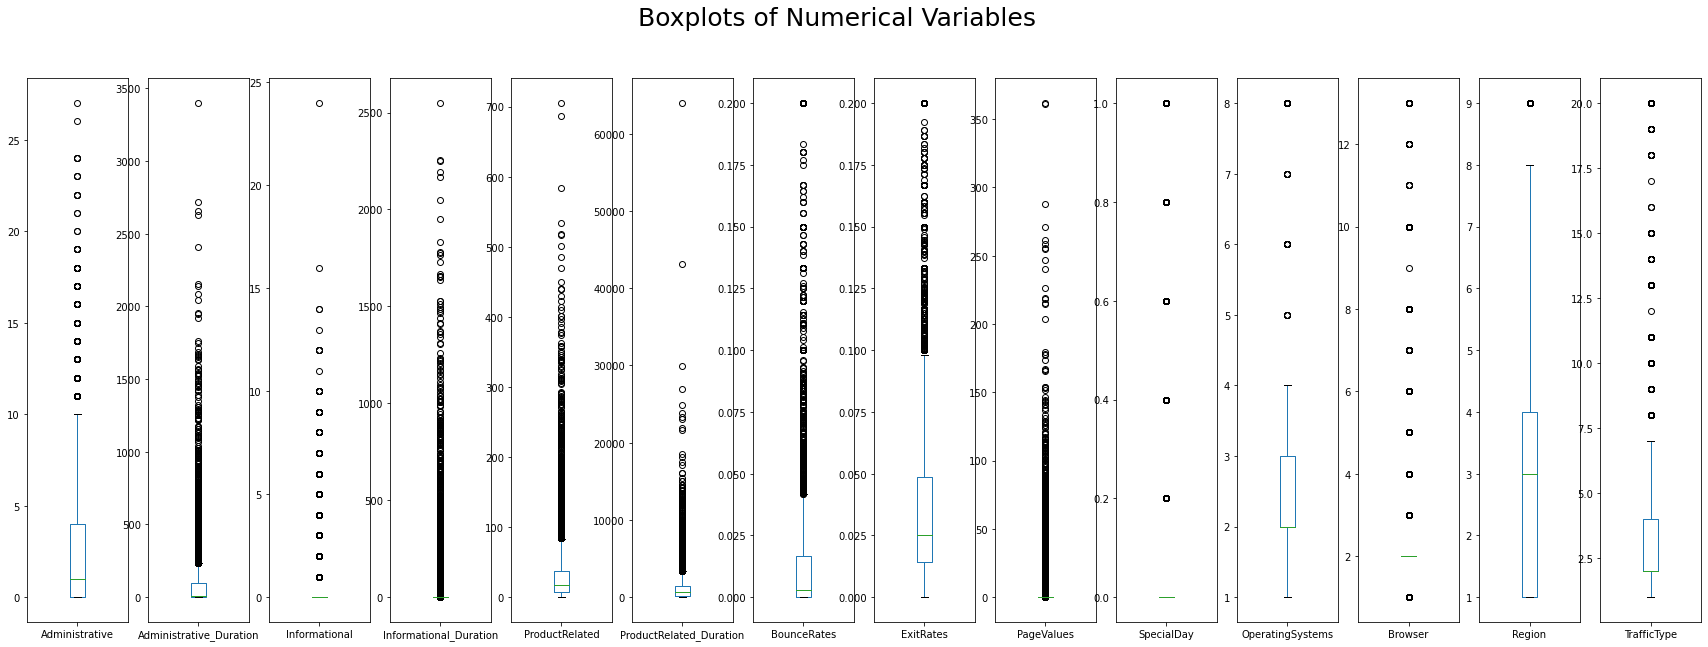

In [660]:
num_feature_size = df_eco_num.shape[1]
fig, axs = plt.subplots(1,num_feature_size,figsize=(30,10))

for idx in range(1, num_feature_size+1):
    plt.subplot(1,num_feature_size,idx)
    df_eco_num.iloc[:, idx-1].plot(kind = 'box')
plt.suptitle('Boxplots of Numerical Variables', fontsize = 25)
plt.show()


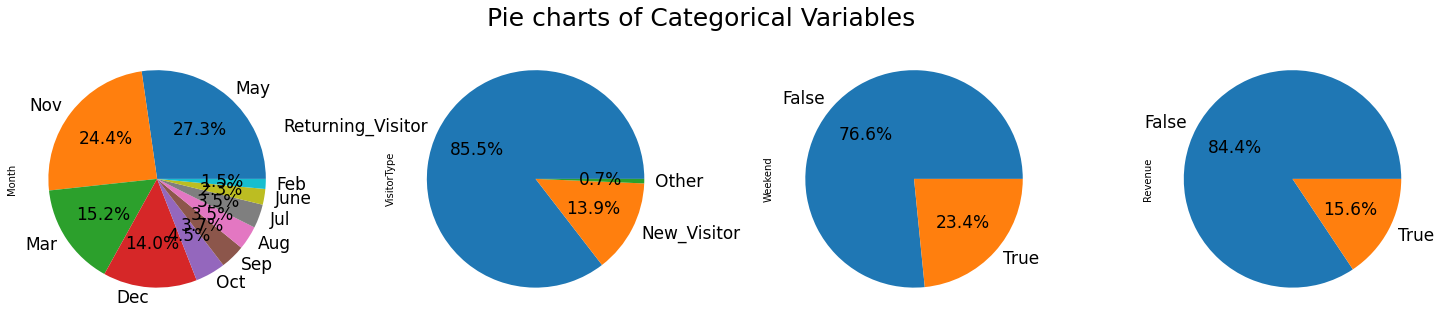

In [661]:
df_eco_cat = df_eco_dropdp.select_dtypes(include = ['object', 'bool']).copy()
cat_feature_size = df_eco_cat.shape[1]
fig,axs = plt.subplots(1, cat_feature_size, figsize = (26,5))

for idx in range(1, cat_feature_size+1):
    plt.subplot(1, cat_feature_size, idx)
    df_eco_cat.iloc[:, idx-1].value_counts().plot(kind = 'pie', autopct = "%1.1f%%", fontsize = 17)
    
plt.suptitle('Pie charts of Categorical Variables', fontsize = 25)
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

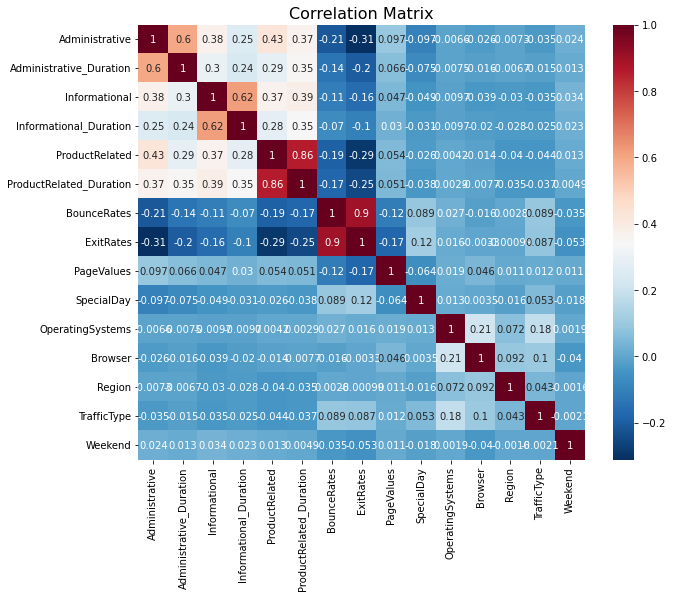

In [662]:
corr_matrix = df_eco_dropdp.loc[:, df_eco_dropdp.columns!= 'Revenue'].corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, cmap = 'RdBu_r', annot= True)
plt.title('Correlation Matrix', fontsize = 16)

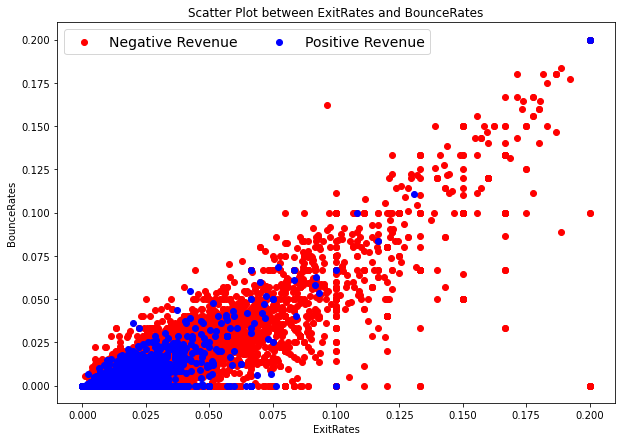

In [663]:
plt.figure(figsize = (10,7))

scatter2 = plt.scatter(x='ExitRates',y='BounceRates', data =df_eco_dropdp[df_eco_dropdp['Revenue']==False], c = 'red')        
scatter1 = plt.scatter(x='ExitRates',y='BounceRates', data =df_eco_dropdp[df_eco_dropdp['Revenue']==True], c= 'blue')
plt.legend((scatter2, scatter1),
           ('Negative Revenue', 'Positive Revenue',),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=14)
plt.title('Scatter Plot between ExitRates and BounceRates')
plt.xlabel('ExitRates')
plt.ylabel('BounceRates')
plt.show()

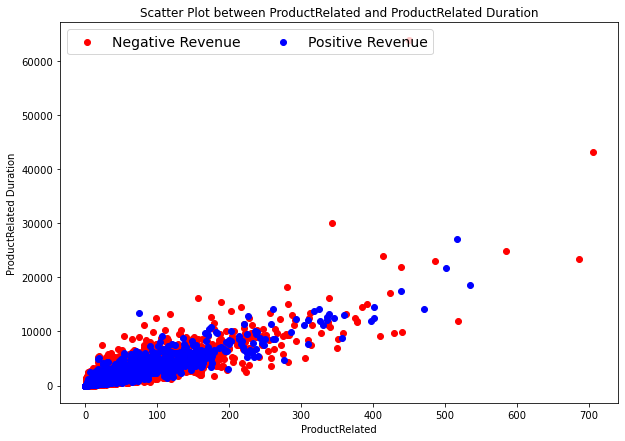

In [664]:
plt.figure(figsize = (10,7))

scatter2 = plt.scatter(x='ProductRelated',y='ProductRelated_Duration', data =df_eco_dropdp[df_eco_dropdp['Revenue']==False], c = 'red')        
scatter1 = plt.scatter(x='ProductRelated',y='ProductRelated_Duration', data =df_eco_dropdp[df_eco_dropdp['Revenue']==True], c= 'blue')
plt.legend((scatter2, scatter1),
           ('Negative Revenue', 'Positive Revenue',),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=14)
plt.title('Scatter Plot between ProductRelated and ProductRelated Duration')
plt.xlabel('ProductRelated')
plt.ylabel('ProductRelated Duration')
plt.show()

# Feature Engineering

In [665]:
df_eco_dropdp['Administrative'] =  pd.qcut(df_eco_dropdp['Administrative'], q=2)
df_eco_dropdp['Administrative_Duration'] =  pd.qcut(df_eco_dropdp['Administrative_Duration'], q=2)

In [666]:
df_eco_dropdp.loc[ df_eco_dropdp['Informational']>0,  'Informational'] = 1

In [667]:
df_eco_dropdp['Informational'] = df_eco_dropdp['Informational'].astype('float')

In [668]:
df_eco_dropdp.loc[ df_eco_dropdp['Informational_Duration']>0,  'Informational_Duration'] = 1

In [669]:
df_eco_dropdp['Informational_Duration'] = df_eco_dropdp['Informational_Duration'].astype('float')

In [670]:
df_eco_dropdp['ProductRelated'] =  pd.qcut(df_eco_dropdp['ProductRelated'], q=3)
df_eco_dropdp['ProductRelated_Duration'] =  pd.qcut(df_eco_dropdp['ProductRelated_Duration'], q=3)

In [671]:
df_eco_dropdp['BounceRates'] =  pd.qcut(df_eco_dropdp['BounceRates'], q=2)

In [672]:
df_eco_dropdp['ExitRates'] =  pd.qcut(df_eco_dropdp['ExitRates'], q=10)

In [673]:
df_eco_dropdp.loc[ df_eco_dropdp['PageValues']>0,  'PageValues'] = 1

In [674]:
df_eco_dropdp['PageValues'].value_counts()

0.0    9475
1.0    2730
Name: PageValues, dtype: int64

In [675]:
df_eco_dropdp.loc[ df_eco_dropdp['SpecialDay']>0,  'SpecialDay'] = 1

In [676]:
df_eco_dropdp['SpecialDay'].value_counts()

0.0    10956
1.0     1249
Name: SpecialDay, dtype: int64

In [677]:
df_eco_dropdp.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,"(-0.001, 1.0]","(-0.001, 9.0]",0.0,0.0,"(-0.001, 11.0]","(-0.001, 303.667]","(0.0029, 0.2]","(0.1, 0.2]",0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,"(-0.001, 1.0]","(-0.001, 9.0]",0.0,0.0,"(-0.001, 11.0]","(-0.001, 303.667]","(-0.001, 0.0029]","(0.0564, 0.1]",0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,"(-0.001, 1.0]","(-0.001, 9.0]",0.0,0.0,"(-0.001, 11.0]","(-0.001, 303.667]","(0.0029, 0.2]","(0.1, 0.2]",0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,"(-0.001, 1.0]","(-0.001, 9.0]",0.0,0.0,"(-0.001, 11.0]","(-0.001, 303.667]","(0.0029, 0.2]","(0.1, 0.2]",0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,"(-0.001, 1.0]","(-0.001, 9.0]",0.0,0.0,"(-0.001, 11.0]","(303.667, 1098.525]","(0.0029, 0.2]","(0.04, 0.0564]",0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [678]:
df_eco_dropdp.dtypes

Administrative             category
Administrative_Duration    category
Informational               float64
Informational_Duration      float64
ProductRelated             category
ProductRelated_Duration    category
BounceRates                category
ExitRates                  category
PageValues                  float64
SpecialDay                  float64
Month                        object
OperatingSystems              int64
Browser                       int64
Region                        int64
TrafficType                   int64
VisitorType                  object
Weekend                        bool
Revenue                        bool
dtype: object

In [679]:
df_eco_other = df_eco_dropdp.select_dtypes(exclude = ['category'])
df_eco_cat = df_eco_dropdp.select_dtypes(include = ['category'])

df_eco_other['Revenue'] = df_eco_other['Revenue'].astype('category').cat.codes.astype('int64')
df_eco_other['Weekend'] = df_eco_other['Weekend'].astype('category').cat.codes.astype('int64')
df_eco_other['Month'] = df_eco_other['Month'].astype('category').cat.codes.astype('int64')
df_eco_other['VisitorType'] = df_eco_other['VisitorType'].astype('category').cat.codes.astype('int64')

In [680]:
for col in df_eco_cat.columns:
    df_eco_cat[col] = df_eco_cat[col].cat.codes.astype('int64')
df_ip_tree = pd.concat([df_eco_cat, df_eco_other],axis = 1)

In [681]:
df_ip_tree.head()

,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,Informational,Informational_Duration,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,0,1,9,0.0,0.0,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0,0,0,0,8,0.0,0.0,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0,0,0,1,9,0.0,0.0,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0,0,0,1,9,0.0,0.0,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0,0,1,1,7,0.0,0.0,0.0,0.0,2,3,3,1,4,2,1,0


In [682]:
df_eco_dummy = df_eco_dropdp.select_dtypes(include = ['category','object', 'int64'])
df_eco_finish = df_eco_dropdp.select_dtypes(include = ['float64'])
df_eco_cat = df_eco_dropdp.select_dtypes(include = ['bool'])

df_eco_dummy.shape

(12205, 12)

In [683]:
df_eco_dummy = pd.get_dummies(df_eco_dummy.astype(str))

In [684]:
df_eco_dummy.shape

(12205, 85)

In [685]:
df_eco_cat['Revenue'] = df_eco_cat['Revenue'].astype('category').cat.codes.astype('int64')
df_eco_cat['Weekend'] = df_eco_cat['Weekend'].astype('category').cat.codes.astype('int64')

In [686]:
df_ip = pd.concat([df_eco_dummy, df_eco_cat,df_eco_finish],axis = 1)

In [556]:
df_ip.head()

,"Administrative_(-0.001, 1.0]","Administrative_(1.0, 27.0]","Administrative_Duration_(-0.001, 9.0]","Administrative_Duration_(9.0, 3398.75]","ProductRelated_(-0.001, 11.0]","ProductRelated_(11.0, 29.0]","ProductRelated_(29.0, 705.0]","ProductRelated_Duration_(-0.001, 303.667]","ProductRelated_Duration_(1098.525, 63973.522]","ProductRelated_Duration_(303.667, 1098.525]",...,TrafficType_9,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend,Revenue,Informational,Informational_Duration,PageValues,SpecialDay
0,1,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0.0,0.0,0.0,0.0
1,1,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0.0,0.0,0.0,0.0
2,1,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0.0,0.0,0.0,0.0
3,1,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0.0,0.0,0.0,0.0
4,1,0,1,0,1,0,0,0,0,1,...,0,0,0,1,1,0,0.0,0.0,0.0,0.0


# Prepare Data

In [687]:
from sklearn.model_selection import train_test_split
import numpy as np

orig_X = df_ip.drop('Revenue', axis = 1)
orig_y = df_ip['Revenue']

orig_X_train_df, orig_X_test_df, orig_y_train_df,orig_y_test_df = train_test_split(orig_X, orig_y, test_size = 0.2, random_state = 42)
orig_X_train = orig_X_train_df.values
orig_X_test = orig_X_test_df.values
orig_y_train = orig_y_train_df.values
orig_y_test = orig_y_test_df.values

train_unique_label, train_unique_count = np.unique(orig_y_train,return_counts = True)
test_unique_label, test_unique_count = np.unique(orig_y_test, return_counts = True)
print('Label distribution:')
print('Train data:', train_unique_count/len(orig_y_train))
print('Test data:',test_unique_count/len(orig_y_test))

Label distribution:
Train data: [0.84166325 0.15833675]
Test data: [0.85170012 0.14829988]


In [690]:
tree_X = df_ip_tree.drop('Revenue', axis = 1)
tree_y = df_ip_tree['Revenue']

tree_X_train_df, tree_X_test_df, tree_y_train_df,tree_y_test_df = train_test_split(tree_X, tree_y, test_size = 0.2, random_state = 42)
tree_X_train = tree_X_train_df.values
tree_X_test = tree_X_test_df.values
tree_y_train = tree_y_train_df.values
tree_y_test = tree_y_test_df.values

# Benchmark Models

In [691]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [695]:
log_reg_params = {"penalty": ['l1', 'l2','elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

def Log_reg_train(X_train, y_train, params):
    grid_log_reg = GridSearchCV(LogisticRegression(), params,cv = 5, n_jobs = -1, verbose = 2)
    grid_log_reg.fit(X_us, y_us)
    print('The best parameters are:',grid_log_reg.best_params_)
    res_log_reg = grid_log_reg.best_estimator_
    print('Logistic Regression Cross Validation Score: ', round(grid_log_reg.best_score_ * 100, 2).astype(str) + '%')
    return res_log_reg

In [693]:
bm_log_reg = Log_reg_train(orig_X_train, orig_y_train, log_reg_params)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
The best parameters are: {'C': 0.1, 'penalty': 'l2'}
Logistic Regression Cross Validation Score:  84.7%


In [696]:
from sklearn.ensemble import RandomForestClassifier

random_forest_params = {
    'max_depth': [10,20],
    'min_samples_leaf': [3, 4, 5],
    'n_estimators': [500, 1000]
}

def RF_train(X_train, y_train,params):
    grid_rf = GridSearchCV(estimator = RandomForestClassifier(), param_grid = params, 
                          cv = 5, n_jobs = -1, verbose = 2)
    grid_rf.fit(X_train, y_train)
    print('The best parameters are:',grid_rf.best_params_)
    res_rf = grid_rf.best_estimator_
    print('Random Forest Cross Validation Score: ', round(grid_rf.best_score_ * 100, 2).astype(str) + '%')
    return res_rf

In [697]:
bm_rf = RF_train(tree_X_train, tree_y_train, random_forest_params)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
The best parameters are: {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 1000}
Random Forest Cross Validation Score:  90.15%


In [ ]:
pip install lightgbm

In [573]:
import lightgbm as lgb
import re

lgbm_params = {
    'num_leaves': [30, 40, 50, 60], 
    'max_depth': range(2,5),
    'n_estimators' : [100,200,400],
    'min_data_in_leaf': [30,50,70]
}

def lgbm_train(X_train, y_train,params):
    X_us_lgbm = X_us_tree.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    grid_lgb = GridSearchCV(estimator = lgb.LGBMClassifier(), param_grid = params, 
                          cv = 5, n_jobs = -1, verbose = 2)
    grid_lgb.fit(X_train, y_train)
    print('The best parameters are:',grid_lgb.best_params_)
    res_lgb = grid_lgb.best_estimator_
    print('LightGBM Cross Validation Score: ', round(grid_lgb.best_score_ * 100, 2).astype(str) + '%')
    return res_lgb

In [574]:
bm_lgbm = lgbm_train(tree_X_train, tree_y_train, lgbm_params)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
The best parameters are: {'max_depth': 2, 'min_data_in_leaf': 70, 'n_estimators': 200, 'num_leaves': 30}
LightGBM Cross Validation Score:  90.28%


# Random Undersampling

In [575]:
orig_train = pd.concat([orig_X_train_df, orig_y_train_df], axis = 1)
df_undersp = orig_train.sample(frac = 1)
df_pos = df_undersp.loc[df_undersp['Revenue']==1]
df_neg = df_undersp.loc[df_undersp['Revenue']!=1][:len(df_pos)]

In [577]:
tree_train = pd.concat([tree_X_train_df, tree_y_train_df], axis = 1)
df_us_tree = tree_train.sample(frac = 1)
df_pos_tree = df_us_tree.loc[df_us_tree['Revenue']==1]
df_neg_tree = df_us_tree.loc[df_us_tree['Revenue']!=1][:len(df_pos_tree)]
balance_df_tree = pd.concat([df_pos_tree, df_neg_tree]).sample(frac = 1, random_state = 40)

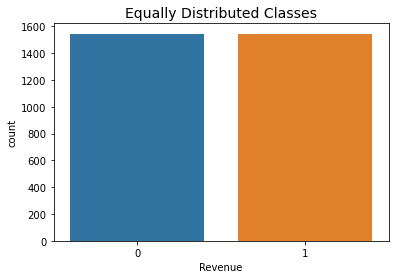

In [578]:
balance_df = pd.concat([df_pos, df_neg]).sample(frac = 1, random_state = 40)
balance_df['Revenue'].value_counts()
sns.countplot('Revenue', data = balance_df)
plt.title('Equally Distributed Classes', fontsize = 14)
plt.show()

In [583]:
X_us = balance_df.drop('Revenue', axis = 1)
y_us = balance_df.loc[:,['Revenue']]

us_log_reg = Log_reg_train(X_us, y_us, log_reg_params)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
The best parameters are: {'C': 0.1, 'penalty': 'l2'}
Logistic Regression Cross Validation Score:  84.7%


In [595]:
X_us_tree = balance_df_tree.drop('Revenue', axis = 1)
y_us_tree = balance_df_tree.loc[:,['Revenue']]

us_rf = RF_train(X_us_tree, y_us_tree, random_forest_params)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
The best parameters are: {'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 1000}
Random Forest Cross Validation Score:  85.54%


In [586]:
us_lgbm = lgbm_train(X_us_tree, y_us_tree, lgbm_params)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
The best parameters are: {'max_depth': 3, 'min_data_in_leaf': 70, 'n_estimators': 100, 'num_leaves': 30}
LightGBM Cross Validation Score:  85.41%


# SMOTE Oversampling

In [156]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [589]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy = 'minority')
X_os, y_os = oversample.fit_resample(orig_X_train, orig_y_train)

train_unique_label, train_unique_count = np.unique(y_os,return_counts = True)
test_unique_label, test_unique_count = np.unique(orig_y_test, return_counts = True)
print('Label distribution :')
print('Train Data:',train_unique_count/len(y_os))
print('Test Data:',test_unique_count/len(orig_y_test))

Label distribution :
Train Data: [0.5 0.5]
Test Data: [0.85170012 0.14829988]


In [588]:
X_os_tree, y_os_tree = oversample.fit_resample(tree_X_train, tree_y_train)

In [593]:
os_log_reg = Log_reg_train(X_os, y_os, log_reg_params)


Fitting 5 folds for each of 21 candidates, totalling 105 fits
The best parameters are: {'C': 0.1, 'penalty': 'l2'}
Logistic Regression Cross Validation Score:  84.7%


In [598]:
os_rf = RF_train(X_os_tree, y_os_tree, random_forest_params)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
The best parameters are: {'max_depth': 20, 'min_samples_leaf': 3, 'n_estimators': 500}
Random Forest Cross Validation Score:  92.89%


In [596]:
os_lgbm = lgbm_train(X_os_tree, y_os_tree, lgbm_params)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
The best parameters are: {'max_depth': 3, 'min_data_in_leaf': 50, 'n_estimators': 100, 'num_leaves': 30}
LightGBM Cross Validation Score:  91.58%


# Classifier Estimation 

In [607]:
y_pred_bm_log_reg = bm_log_reg.predict(orig_X_test)
y_pred_bm_rf = bm_rf.predict(tree_X_test)
y_pred_bm_lgbm = bm_lgbm.predict(tree_X_test)

y_pred_us_log_reg = us_log_reg.predict(orig_X_test)
y_pred_us_rf = us_rf.predict(tree_X_test)
y_pred_us_lgbm = us_lgbm.predict(tree_X_test)

y_pred_os_log_reg = os_log_reg.predict(orig_X_test)
y_pred_os_rf = os_rf.predict(tree_X_test)
y_pred_os_lgbm = os_lgbm.predict(tree_X_test)

In [604]:
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score

def models_evaluation_classification_report(models,y_pred_dict, y_test, title,labels = ['False', 'True'] ):
    for key, model in models.items():
        print('{}: \n'.format(title))
        y_pred = y_pred_dict[key]
        print('{}:'.format(key))
        print(classification_report(y_test, y_pred, target_names=labels))
        print('{} F1 score:'.format(key), '{:.3f} \n'.format(f1_score(y_test, y_pred,average='binary')))

In [714]:
models = {'Logistic Regression': bm_log_reg, 'Random Forest':bm_rf, 'LightGBM':bm_lgbm}
y_pred_dict =  {'Logistic Regression': y_pred_bm_log_reg, 'Random Forest':y_pred_bm_rf, 'LightGBM':y_pred_bm_lgbm}

models_evaluation_classification_report(models,y_pred_dict, orig_y_test, 'Benchmark Models')

Benchmark Models: 

Logistic Regression:
              precision    recall  f1-score   support

       False       0.96      0.87      0.91      2079
        True       0.52      0.80      0.63       362

    accuracy                           0.86      2441
   macro avg       0.74      0.84      0.77      2441
weighted avg       0.90      0.86      0.87      2441

Logistic Regression F1 score: 0.630 

Benchmark Models: 

Random Forest:
              precision    recall  f1-score   support

       False       0.93      0.96      0.95      2079
        True       0.74      0.56      0.64       362

    accuracy                           0.90      2441
   macro avg       0.83      0.76      0.79      2441
weighted avg       0.90      0.90      0.90      2441

Random Forest F1 score: 0.636 

Benchmark Models: 

LightGBM:
              precision    recall  f1-score   support

       False       0.93      0.96      0.94      2079
        True       0.71      0.58      0.64       362

    ac

In [608]:
models = {'Logistic Regression': us_log_reg, 'Random Forest':us_rf, 'LightGBM':us_lgbm}
y_pred_dict =  {'Logistic Regression': y_pred_us_log_reg, 'Random Forest':y_pred_us_rf, 'LightGBM':y_pred_us_lgbm}

models_evaluation_classification_report(models,y_pred_dict, orig_y_test, 'Random Undersampling')

Random Undersampling: 

Logistic Regression:
              precision    recall  f1-score   support

       False       0.96      0.87      0.91      2079
        True       0.51      0.80      0.63       362

    accuracy                           0.86      2441
   macro avg       0.74      0.84      0.77      2441
weighted avg       0.90      0.86      0.87      2441

Logistic Regression F1 score: 0.626 

Random Undersampling: 

Random Forest:
              precision    recall  f1-score   support

       False       0.97      0.85      0.90      2079
        True       0.49      0.85      0.62       362

    accuracy                           0.85      2441
   macro avg       0.73      0.85      0.76      2441
weighted avg       0.90      0.85      0.86      2441

Random Forest F1 score: 0.622 

Random Undersampling: 

LightGBM:
              precision    recall  f1-score   support

       False       0.97      0.85      0.91      2079
        True       0.50      0.85      0.63      

In [610]:
models = {'Logistic Regression': os_log_reg, 'Random Forest':os_rf, 'LightGBM':os_lgbm}
y_pred_dict =  {'Logistic Regression': y_pred_os_log_reg, 'Random Forest':y_pred_os_rf, 'LightGBM':y_pred_os_lgbm}

models_evaluation_classification_report(models,y_pred_dict, orig_y_test, 'SMOTE Oversampling')

SMOTE Oversampling: 

Logistic Regression:
              precision    recall  f1-score   support

       False       0.96      0.87      0.91      2079
        True       0.51      0.80      0.63       362

    accuracy                           0.86      2441
   macro avg       0.74      0.84      0.77      2441
weighted avg       0.90      0.86      0.87      2441

Logistic Regression F1 score: 0.626 

SMOTE Oversampling: 

Random Forest:
              precision    recall  f1-score   support

       False       0.94      0.94      0.94      2079
        True       0.65      0.65      0.65       362

    accuracy                           0.90      2441
   macro avg       0.79      0.79      0.79      2441
weighted avg       0.90      0.90      0.90      2441

Random Forest F1 score: 0.650 

SMOTE Oversampling: 

LightGBM:
              precision    recall  f1-score   support

       False       0.95      0.92      0.93      2079
        True       0.59      0.70      0.64       362



In [618]:
def models_evaluation_confusion_matrix(models,y_pred_dict, y_test, title, labels = ['False', 'True']):
    fig,axs = plt.subplots( 1, len(y_pred_dict),figsize = (30,7))
    idx  = 0
    
    for key, model in models.items():
        y_pred = y_pred_dict[key]
        
        cm = confusion_matrix(y_test, y_pred)
        cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
        
        sns.heatmap(cm_matrix, ax = axs[idx], annot=True, fmt='d', cmap="YlGnBu", annot_kws={"fontsize":18})
        axs[idx].set_title('{}:'.format(key), fontsize =14)
        idx+=1
    plt.suptitle('Confusion Matrix of {}'.format(title), fontsize = 20)
    plt.show()
        

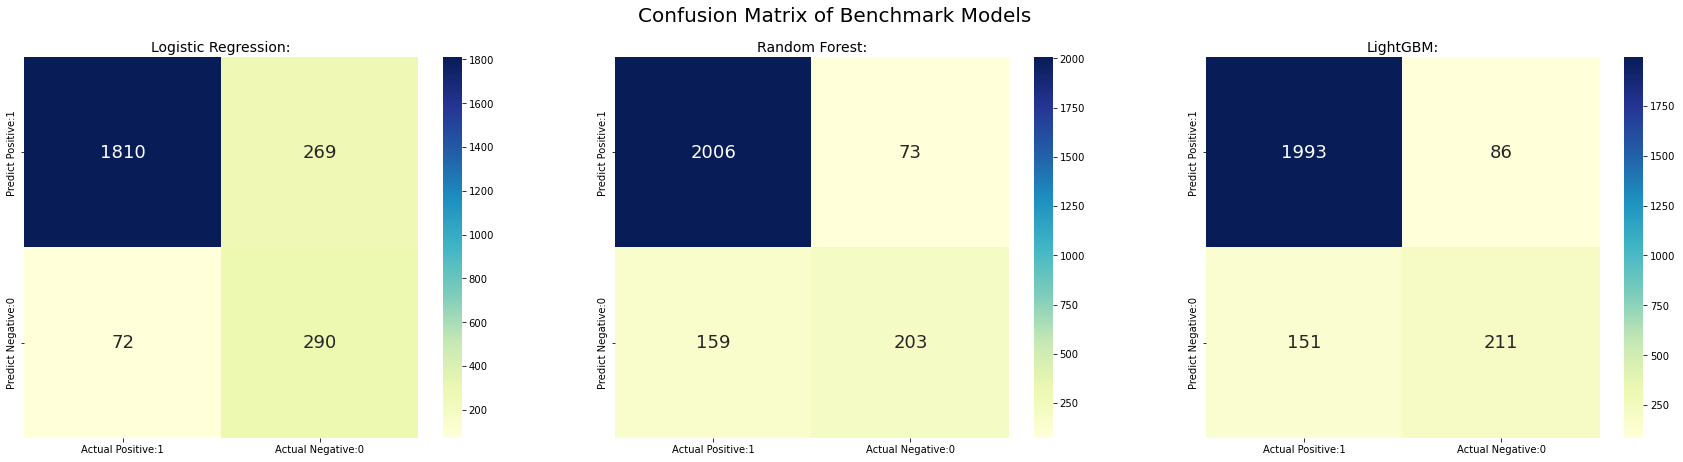

In [619]:
models = {'Logistic Regression': bm_log_reg, 'Random Forest':bm_rf, 'LightGBM':bm_lgbm}
y_pred_dict =  {'Logistic Regression': y_pred_bm_log_reg, 'Random Forest':y_pred_bm_rf, 'LightGBM':y_pred_bm_lgbm}

models_evaluation_confusion_matrix(models,y_pred_dict,   orig_y_test, 'Benchmark Models')

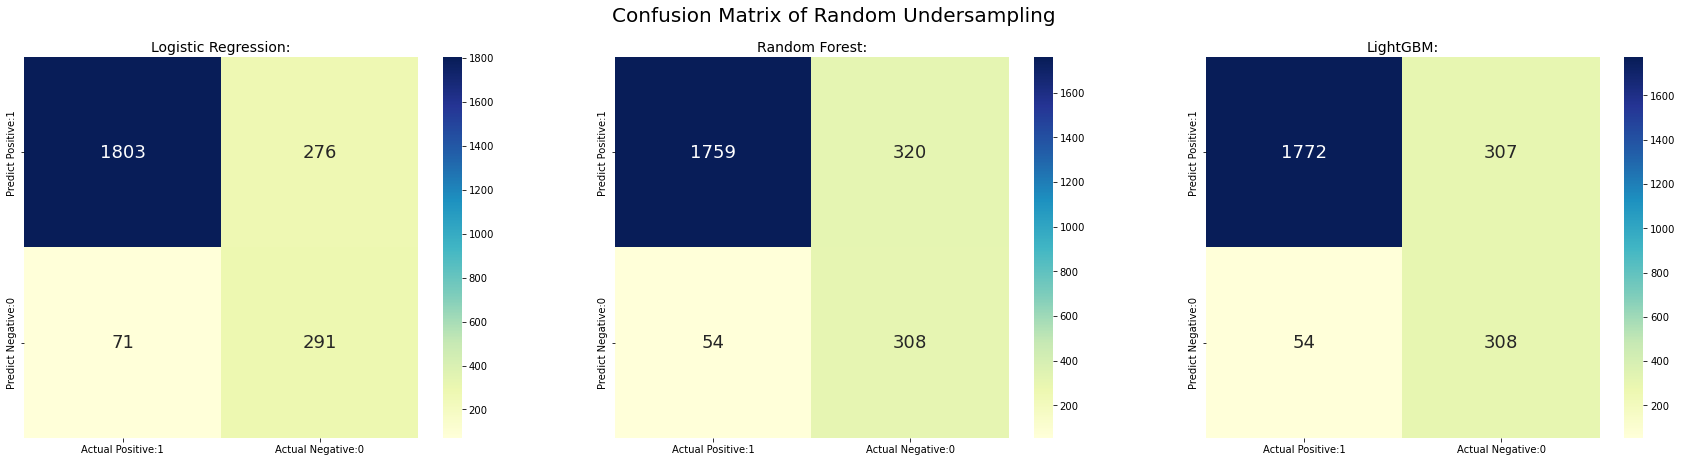

In [620]:
models = {'Logistic Regression': us_log_reg, 'Random Forest':us_rf, 'LightGBM':us_lgbm}
y_pred_dict =  {'Logistic Regression': y_pred_us_log_reg, 'Random Forest':y_pred_us_rf, 'LightGBM':y_pred_us_lgbm}
models_evaluation_confusion_matrix(models,y_pred_dict,   orig_y_test, 'Random Undersampling')

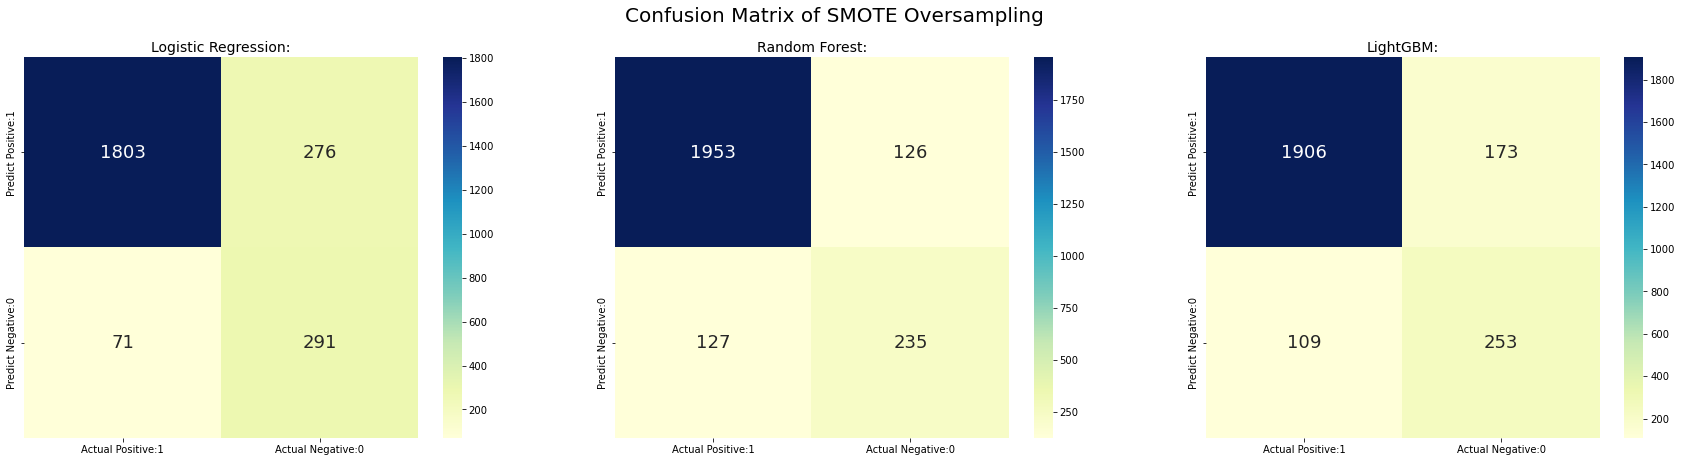

In [621]:
models = {'Logistic Regression': os_log_reg, 'Random Forest':os_rf, 'LightGBM':os_lgbm}
y_pred_dict =  {'Logistic Regression': y_pred_os_log_reg, 'Random Forest':y_pred_os_rf, 'LightGBM':y_pred_os_lgbm}
models_evaluation_confusion_matrix(models,y_pred_dict,   orig_y_test, 'SMOTE Oversampling')

In [624]:
def models_evaluation_ROC_curve(models,y_pred_dict, X_test_dict, y_test, title, labels = ['False', 'True']):
    
    num_models = len(models)
    
    plt.figure(figsize=(8,6))
    plt.title('ROC Curves of {}'.format(title), fontsize=18)
    
    for key, model in models.items():
        y_pred = y_pred_dict[key]
        fpr, tpr, thresold = roc_curve(y_test, model.predict_proba(X_test_dict[key])[:,1])
        plt.plot(fpr, tpr, label='{} Classifier Score: {:.4f}'.format(key, roc_auc_score(y_test, y_pred)))
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend()

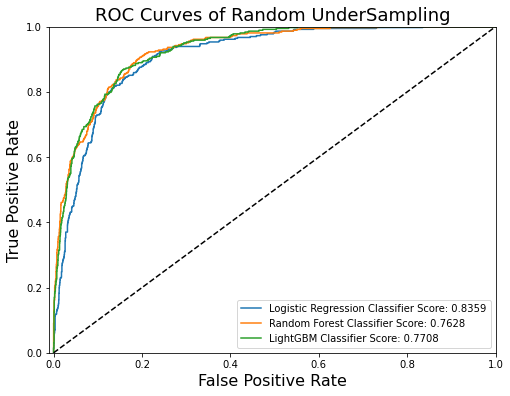

In [627]:
models = {'Logistic Regression': bm_log_reg, 'Random Forest':bm_rf, 'LightGBM':bm_lgbm}
X_test_dict =  {'Logistic Regression': orig_X_test, 'Random Forest':tree_X_test, 'LightGBM':tree_X_test}

y_pred_dict =  {'Logistic Regression': y_pred_bm_log_reg, 'Random Forest':y_pred_bm_rf, 'LightGBM':y_pred_bm_lgbm}

models_evaluation_ROC_curve(models,y_pred_dict, X_test_dict,   orig_y_test, 'Random UnderSampling')

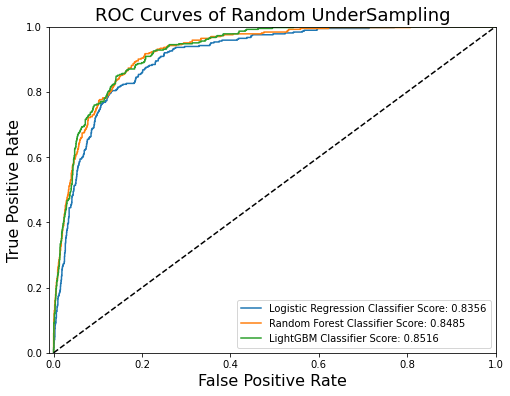

In [629]:
models = {'Logistic Regression': us_log_reg, 'Random Forest':us_rf, 'LightGBM':us_lgbm}
X_test_dict =  {'Logistic Regression': orig_X_test, 'Random Forest':tree_X_test, 'LightGBM':tree_X_test}

y_pred_dict =  {'Logistic Regression': y_pred_us_log_reg, 'Random Forest':y_pred_us_rf, 'LightGBM':y_pred_us_lgbm}

models_evaluation_ROC_curve(models,y_pred_dict, X_test_dict,   orig_y_test, 'Random UnderSampling')

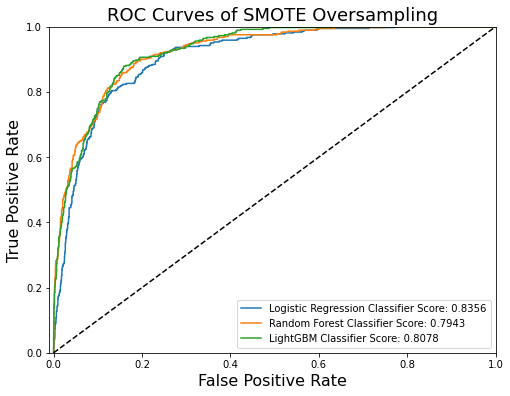

In [628]:
models = {'Logistic Regression': os_log_reg, 'Random Forest':os_rf, 'LightGBM':os_lgbm}
X_test_dict =  {'Logistic Regression': orig_X_test, 'Random Forest':tree_X_test, 'LightGBM':tree_X_test}

y_pred_dict =  {'Logistic Regression': y_pred_os_log_reg, 'Random Forest':y_pred_os_rf, 'LightGBM':y_pred_os_lgbm}

models_evaluation_ROC_curve(models,y_pred_dict, X_test_dict,   orig_y_test, 'SMOTE Oversampling')

# Feature Analysis

In [715]:
# The logistic regression models performed similarly between different strategies
# Optimized the bench mark logistic regression model by feature selection 
    
def Feature_importance_log_reg(orig_X_train_df, model):
    log_reg_importances = pd.DataFrame(data={
        'Feature': orig_X_train_df.columns,
        'Importance': model.coef_[0]
    })
    log_reg_importances = log_reg_importances.sort_values(by='Importance', ascending=False)
    log_reg_importances = pd.concat([log_reg_importances.head(10), log_reg_importances.tail(10)], axis =0)
    plt.bar(x=log_reg_importances['Feature'], height=log_reg_importances['Importance'])
    plt.title('Feature importances obtained from coefficients', size=10)
    plt.xticks(rotation='vertical')
    plt.figure(figsize=(13, 7))
    plt.show()

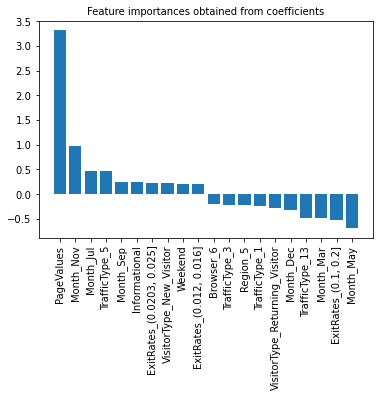

<Figure size 936x504 with 0 Axes>

In [717]:
Feature_importance_log_reg(orig_X_train_df, bm_log_reg)

In [723]:
# Check Overfitting 
y_pred_train_bm_log_reg = bm_log_reg.predict(orig_X_train)
print('Training Accuracy of Bench Mark Logistic Regression Model:', round(roc_auc_score(orig_y_train, y_pred_train_bm_log_reg)*100,2))
print('Test Accuracy of Bench Mark Logistic Regression Model:', round(roc_auc_score(orig_y_test, y_pred_bm_log_reg)*100,2))

Training Accuracy of Bench Mark Logistic Regression Model: 84.99
Test Accuracy of Bench Mark Logistic Regression Model: 83.59


In [724]:
rf_importances = pd.DataFrame(data={
    'Feature': tree_X_train_df.columns,
    'Importance': us_rf.feature_importances_
})
rf_importances = rf_importances.sort_values(by='Importance', ascending=False)

In [725]:
rf_importances = pd.concat([rf_importances.head(20)], axis =0)

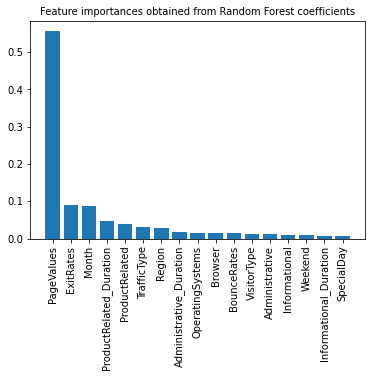

<Figure size 936x504 with 0 Axes>

In [726]:
plt.bar(x=rf_importances['Feature'], height=rf_importances['Importance'])
plt.title('Feature importances obtained from Random Forest coefficients', size=10)
plt.xticks(rotation='vertical')
plt.figure(figsize=(13, 7))
plt.show()

In [727]:
# Check Overfitting 

y_pred_train_us_rf = us_rf.predict(tree_X_train)
print('Training Accuracy of Bench Mark Logistic Regression Model:', round(roc_auc_score(tree_y_train, y_pred_train_us_rf)*100,2))
print('Test Accuracy of Bench Mark Logistic Regression Model:', round(roc_auc_score(tree_y_test, y_pred_us_rf)*100,2))

Training Accuracy of Bench Mark Logistic Regression Model: 87.82
Test Accuracy of Bench Mark Logistic Regression Model: 84.85


# Model Development 